1.<br/>
$u''(x) = f(x), \qquad u(0) = 0, \qquad u(1) = 0$<br/>
$f(x) = $
\begin{cases}
1, & 0.4 \le x \le 0.6,\\[6pt]
0, & \text{otherwise}.
\end{cases}

N=  20, max error = 1.180e-01
N=  40, max error = 1.190e-01
N=  80, max error = 1.195e-01
N= 160, max error = 1.197e-01


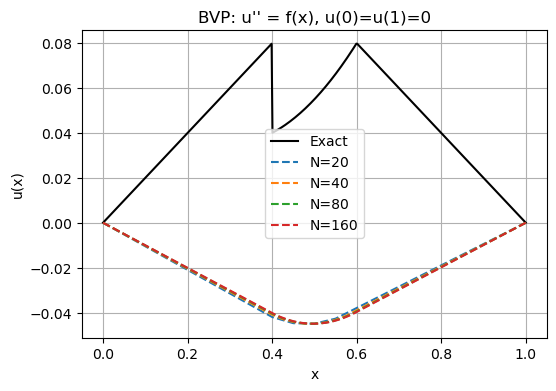

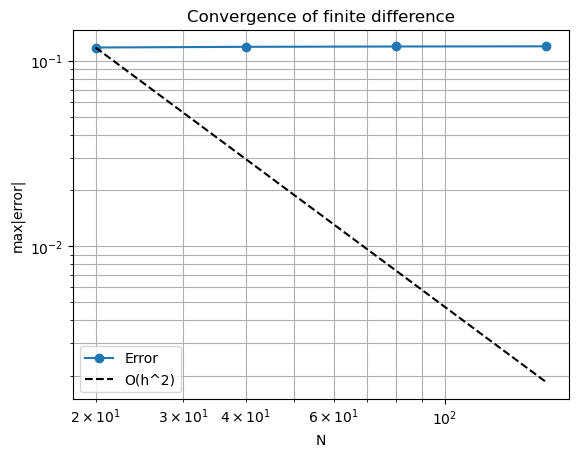

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# --- Problem setup ---
def f(x):
    return np.where((x >= 0.4) & (x <= 0.6), 1.0, 0.0)

def exact_solution(x):
    u = np.zeros_like(x)
    for i, xi in enumerate(x):
        if xi < 0.4:
            u[i] = 0.2 * xi
        elif xi <= 0.6:
            u[i] = 0.5*xi**2 - 0.3*xi + 0.08
        else:
            u[i] = 0.2*(1 - xi)
    return u

# --- Finite difference solver ---
def solve_fd(N):
    h = 1.0 / N
    x = np.linspace(0, 1, N+1)
    fvals = f(x[1:-1])

    A = np.zeros((N-1, N-1))
    np.fill_diagonal(A, -2.0)
    np.fill_diagonal(A[1:], 1.0)
    np.fill_diagonal(A[:,1:], 1.0)
    A /= h**2

    u_inner = np.linalg.solve(A, fvals)
    u = np.concatenate(([0], u_inner, [0]))
    return x, u

# --- Accuracy check ---
Ns = [20, 40, 80, 160]
errors = []
for N in Ns:
    x, u_num = solve_fd(N)
    u_exact = exact_solution(x)
    err = np.max(np.abs(u_num - u_exact))
    errors.append(err)
    print(f"N={N:4d}, max error = {err:.3e}")

# --- Plot ---
plt.figure(figsize=(6,4))
x_fine = np.linspace(0,1,500)
plt.plot(x_fine, exact_solution(x_fine), 'k-', label="Exact")
for N in Ns:
    x, u = solve_fd(N)
    plt.plot(x, u, '--', label=f"N={N}")
plt.xlabel("x"); plt.ylabel("u(x)")
plt.legend(); plt.grid(True)
plt.title("BVP: u'' = f(x), u(0)=u(1)=0")
plt.show()

# --- Error convergence ---
plt.figure()
plt.loglog(Ns, errors, 'o-', label='Error')
plt.loglog(Ns, errors[0]*(np.array(Ns)/Ns[0])**(-2), 'k--', label='O(h^2)')
plt.xlabel("N"); plt.ylabel("max|error|")
plt.title("Convergence of finite difference")
plt.legend(); plt.grid(True, which='both')
plt.show()


2.

$u''(x) - 2u'(x) + u(x) = 1, \qquad
u(0) = 0, \qquad
u'(1) = 1.$

N=  10, max error=4.989e-03
N=  20, max error=1.328e-03
N=  40, max error=3.433e-04
N=  80, max error=8.733e-05
N= 160, max error=2.203e-05
approx slope = -1.9573480807022716


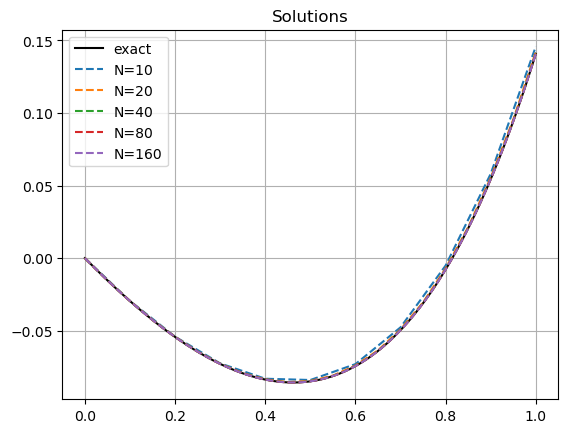

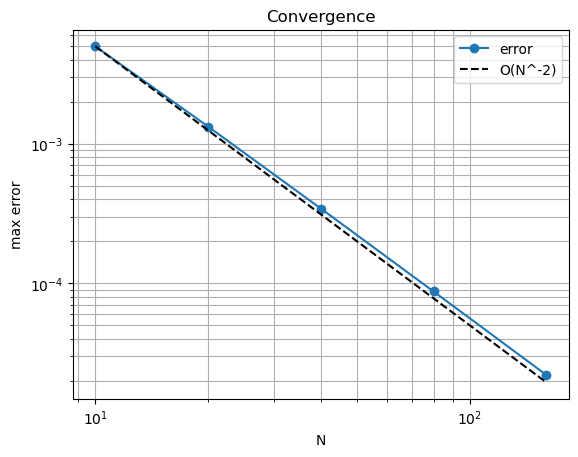

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# ===== exact solution =====
C1 = -1.0
C2 = (1.0 + 1.0/np.e)/2.0
def u_exact(x):
    return (C1 + C2*x)*np.exp(x) + 1.0

# ===== solve by 2nd-order finite difference =====
def solve_fd(N):
    h = 1.0/N
    x = np.linspace(0,1,N+1)
    A = np.zeros((N+1,N+1))
    b = np.ones(N+1)

    # u(0)=0
    A[0,0] = 1;  b[0] = 0

    # interior
    for i in range(1,N):
        A[i,i-1] = 1/h**2 + 1/h
        A[i,i]   = -2/h**2 + 1
        A[i,i+1] = 1/h**2 - 1/h

    # Neumann: u'(1)=1
    A[N,N-2] = 1/(2*h)
    A[N,N-1] = -4/(2*h)
    A[N,N]   = 3/(2*h)
    b[N] = 1

    u = np.linalg.solve(A,b)
    return x,u

# ===== convergence test =====
Ns = [10,20,40,80,160]
errs = []

for N in Ns:
    x,u = solve_fd(N)
    err = np.max(np.abs(u - u_exact(x)))
    errs.append(err)
    print(f"N={N:4d}, max error={err:.3e}")

# slope estimation
p = np.polyfit(np.log(Ns), np.log(errs), 1)
print("approx slope =", p[0])   # should be close to -2

# ===== plot solutions =====
plt.figure()
x_fine = np.linspace(0,1,400)
plt.plot(x_fine, u_exact(x_fine),'k-',label="exact")
for N in Ns:
    x,u = solve_fd(N)
    plt.plot(x,u,'--',label=f"N={N}")
plt.legend(); plt.grid(True); plt.title("Solutions")

# ===== plot error =====
plt.figure()
plt.loglog(Ns,errs,'o-',label="error")
plt.loglog(Ns, errs[0]*(np.array(Ns)/Ns[0])**(-2),'k--',label="O(N^-2)")
plt.grid(True,which='both')
plt.xlabel("N"); plt.ylabel("max error")
plt.legend(); plt.title("Convergence")
plt.show()


3.

$u''(x) = sin(2πx), \qquad
u'(0) = 0, \qquad
u'(1) = 0.$

N=  20, max error=9.926e-02
N=  40, max error=9.424e-02
N=  80, max error=1.938e-02
N= 160, max error=2.844e-03
N= 320, max error=5.944e-03
approx slope = -1.3173961347091416


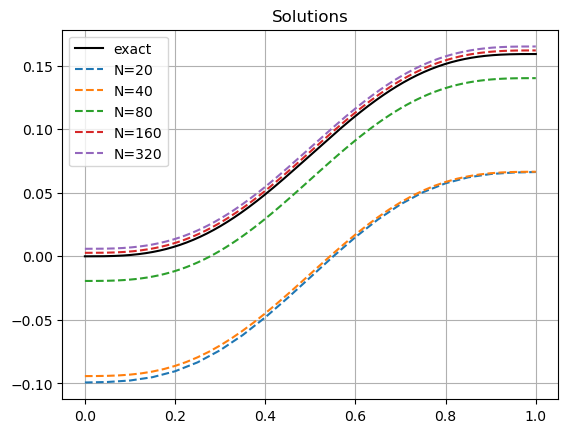

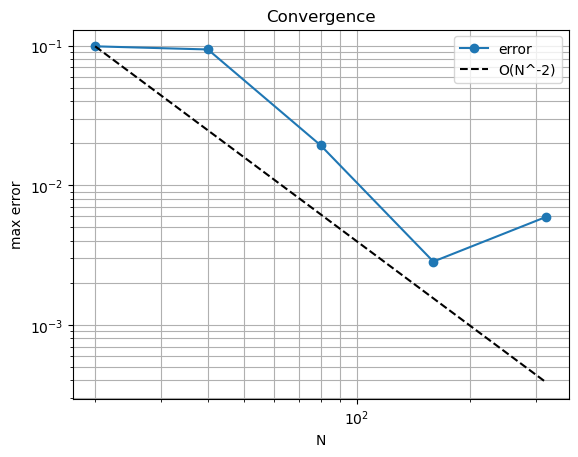

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def u_exact(x):
    return -np.sin(2*np.pi*x)/(4*np.pi**2) + x/(2*np.pi)


# ===== 2nd-order finite difference solver =====
def solve_fd(N):
    h = 1.0/N
    x = np.linspace(0,1,N+1)

    A = np.zeros((N+1,N+1))
    b = np.sin(2*np.pi*x)

    # Neumann u'(0)=0: ( -3u0 + 4u1 - u2 ) / (2h) = 0
    A[0,0] = -3/(2*h)
    A[0,1] =  4/(2*h)
    A[0,2] = -1/(2*h)
    b[0]   = 0

    # interior points
    for i in range(1,N):
        A[i,i-1] = 1/h**2
        A[i,i]   = -2/h**2
        A[i,i+1] = 1/h**2

    # Neumann u'(1)=0: ( 3uN - 4uN-1 + uN-2 )/(2h) = 0
    A[N,N]   =  3/(2*h)
    A[N,N-1] = -4/(2*h)
    A[N,N-2] =  1/(2*h)
    b[N]     = 0

    u = np.linalg.solve(A,b)
    return x,u


# ===== convergence test =====
Ns = [20,40,80,160,320]
errs = []

for N in Ns:
    x,u = solve_fd(N)
    err = np.max(np.abs(u - u_exact(x)))
    errs.append(err)
    print(f"N={N:4d}, max error={err:.3e}")

# slope
p = np.polyfit(np.log(Ns), np.log(errs), 1)
print("approx slope =", p[0])   # → should be close to -2


# ===== plot solution =====
plt.figure()
x_f = np.linspace(0,1,400)
plt.plot(x_f, u_exact(x_f), 'k-', label="exact")
for N in Ns:
    x,u = solve_fd(N)
    plt.plot(x,u,'--',label=f"N={N}")
plt.legend(); plt.grid(True); plt.title("Solutions")


# ===== plot error =====
plt.figure()
plt.loglog(Ns, errs, 'o-', label='error')
plt.loglog(Ns, errs[0]*(np.array(Ns)/Ns[0])**(-2),
           'k--', label='O(N^-2)')
plt.xlabel("N"); plt.ylabel("max error")
plt.title("Convergence"); plt.grid(True,which='both')
plt.legend()
plt.show()

4.

$u''(x) = e^{sin(x)}, \qquad 
u'(0) = 0, \qquad
u'(1) = a.$

alpha = 1.6318696084708444


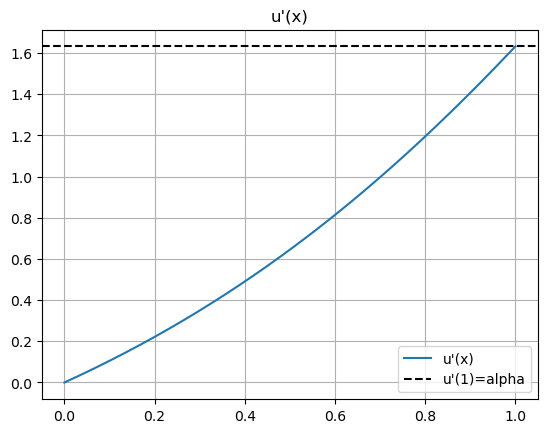

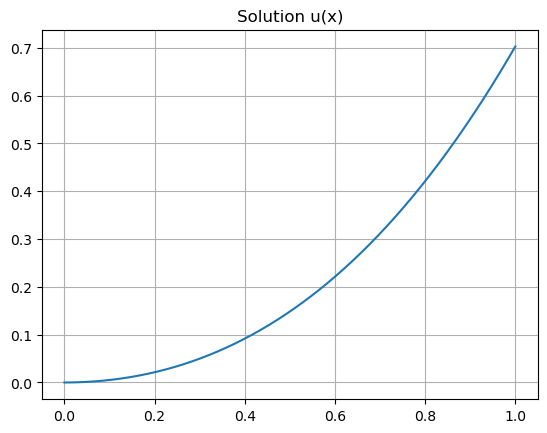

In [5]:
import numpy as np
import matplotlib.pyplot as plt


# ===== f(x) = e^{sin x} =====
def f(x):
    return np.exp(np.sin(x))


# ===== compute alpha =====
# alpha = ∫_0^1 e^{sin x} dx
def compute_alpha(N=20000):
    x = np.linspace(0,1,N)
    fx = f(x)
    return np.trapz(fx, x)


# ===== compute solution u(x) =====
def compute_solution(N=20000):
    x = np.linspace(0,1,N)

    # first integral: u'(x)
    u1 = np.zeros_like(x)
    for i in range(1,len(x)):
        u1[i] = np.trapz(f(x[:i+1]), x[:i+1])   # ∫_0^x f

    # second integral: u(x)
    u = np.zeros_like(x)
    for i in range(1,len(x)):
        u[i] = np.trapz(u1[:i+1], x[:i+1])      # ∫_0^x u'

    return x, u, u1


# ===== run =====
alpha = compute_alpha()
print("alpha =", alpha)

x, u, u1 = compute_solution()

# ===== plot u'(x) and u(x) =====
plt.figure()
plt.plot(x, u1, label="u'(x)")
plt.axhline(alpha, color='k', ls='--', label="u'(1)=alpha")
plt.legend(); plt.grid(True); plt.title("u'(x)")

plt.figure()
plt.plot(x, u,label="u(x)")
plt.grid(True); plt.title("Solution u(x)")

plt.show()


5.

$\epsilon u'' + (1+\epsilon) u' + u = 0, \quad u(0)=0, \quad u(1)=1.$

N=  20,  max error=1.253e+00
N=  40,  max error=5.462e-01
N=  80,  max error=1.565e-01
N= 160,  max error=3.398e-02
N= 320,  max error=8.458e-03
approx slope = -1.8428456318904802


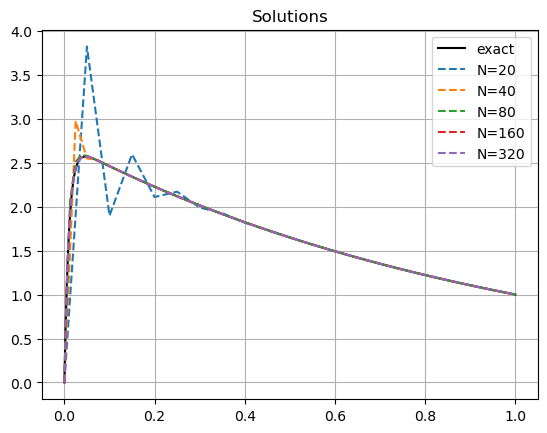

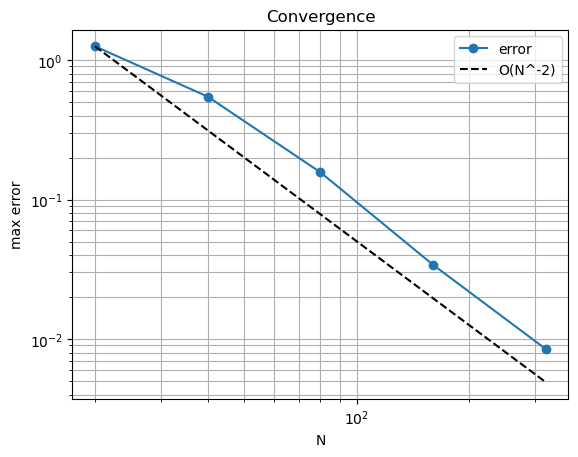

In [6]:
import numpy as np
import matplotlib.pyplot as plt

eps = 0.01

a = eps
b = 1 + eps
c = 1
r1 = (-b + np.sqrt(b*b - 4*a*c)) / (2*a)
r2 = (-b - np.sqrt(b*b - 4*a*c)) / (2*a)

A = 1.0 / (np.exp(r1) - np.exp(r2))
B = -A

def u_exact(x):
    return A*np.exp(r1*x) + B*np.exp(r2*x)


# ===== 2nd-order FD solver =====
def solve_fd(N):
    h = 1.0/N
    x = np.linspace(0,1,N+1)

    A_mat = np.zeros((N+1,N+1))
    b = np.zeros(N+1)

    # u(0)=0
    A_mat[0,0] = 1
    b[0] = 0

    # interior
    for i in range(1,N):
        A_mat[i,i-1] = eps/h**2 - (1+eps)/(2*h)
        A_mat[i,i]   = -2*eps/h**2 + 1
        A_mat[i,i+1] = eps/h**2 + (1+eps)/(2*h)
        b[i] = 0

    # u(1)=1
    A_mat[N,N] = 1
    b[N] = 1

    u = np.linalg.solve(A_mat, b)
    return x,u


# ===== convergence test =====
Ns = [20,40,80,160,320]
errs = []

for N in Ns:
    x,u = solve_fd(N)
    err = np.max(np.abs(u - u_exact(x)))
    errs.append(err)
    print(f"N={N:4d},  max error={err:.3e}")

# slope
p = np.polyfit(np.log(Ns), np.log(errs), 1)
print("approx slope =", p[0])


# ===== plot solutions =====
plt.figure()
x_fine = np.linspace(0,1,400)
plt.plot(x_fine, u_exact(x_fine),'k-',label="exact")
for N in Ns:
    x,u = solve_fd(N)
    plt.plot(x,u,'--',label=f"N={N}")
plt.legend(); plt.grid(True); plt.title("Solutions")


# ===== plot error =====
plt.figure()
plt.loglog(Ns, errs, 'o-', label='error')
plt.loglog(Ns, errs[0]*(np.array(Ns)/Ns[0])**(-2),'k--',label="O(N^-2)")
plt.xlabel("N"); plt.ylabel("max error")
plt.legend(); plt.grid(True,which='both')
plt.title("Convergence")

plt.show()
